### import Libries

In [23]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### Step 2: Load the MNIST  Dataset

In [24]:
# load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
print("Training data shape:", train_images.shape)
print("Test data shape:", test_images.shape)

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


### Step 3 :Normalize the data

In [25]:
# normalize the data
train_images, test_images = train_images / 255.0, test_images / 255.0
print("Data normalized successfully.")

Data normalized successfully.


### step 4: Build the CNN model

In [26]:
model = models.Sequential()          # Create a sequencial CNN model

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))          # First convolutional layer + max pooling
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))          # Second convolutional layer + max pooling
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))          # Third convolutional layer

model.add(layers.Flatten())          # Flatten and dense layers
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

print("CNN model built successfully.")

CNN model built successfully.


### Step 6: Loop through and print each layer's details

In [27]:
print("\n=== LAYER DETAILS ===")
for i, layer in enumerate(model.layers):
  print(f"Layer {i+1}: {layer.name}")
  print(f" Type: {layer.__class__.__name__}")
  try:
    print(f" Output Shape: {layer.output_shape}")
  except AttributeError:
    print(" Output Shape: N/A")
  print(f" Number of Parameters: {layer.count_params()}")
  print("_" * 40)


=== LAYER DETAILS ===
Layer 1: conv2d_6
 Type: Conv2D
 Output Shape: N/A
 Number of Parameters: 320
________________________________________
Layer 2: max_pooling2d_4
 Type: MaxPooling2D
 Output Shape: N/A
 Number of Parameters: 0
________________________________________
Layer 3: conv2d_7
 Type: Conv2D
 Output Shape: N/A
 Number of Parameters: 18496
________________________________________
Layer 4: max_pooling2d_5
 Type: MaxPooling2D
 Output Shape: N/A
 Number of Parameters: 0
________________________________________
Layer 5: conv2d_8
 Type: Conv2D
 Output Shape: N/A
 Number of Parameters: 36928
________________________________________
Layer 6: flatten_2
 Type: Flatten
 Output Shape: N/A
 Number of Parameters: 0
________________________________________
Layer 7: dense_4
 Type: Dense
 Output Shape: N/A
 Number of Parameters: 36928
________________________________________
Layer 8: dense_5
 Type: Dense
 Output Shape: N/A
 Number of Parameters: 650
________________________________________



### model train and test accuracy

In [28]:
# Compile and train the model using Adam optimizer (5 epochs)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 33ms/step - accuracy: 0.8959 - loss: 0.3320 - val_accuracy: 0.9856 - val_loss: 0.0429
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 31ms/step - accuracy: 0.9855 - loss: 0.0456 - val_accuracy: 0.9864 - val_loss: 0.0408
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 32ms/step - accuracy: 0.9900 - loss: 0.0317 - val_accuracy: 0.9873 - val_loss: 0.0378
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 31ms/step - accuracy: 0.9919 - loss: 0.0253 - val_accuracy: 0.9871 - val_loss: 0.0380
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 32ms/step - accuracy: 0.9932 - loss: 0.0195 - val_accuracy: 0.9919 - val_loss: 0.0262


In [29]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest accuracy:", test_acc)

313/313 - 3s - 8ms/step - accuracy: 0.9919 - loss: 0.0262

Test accuracy: 0.9919000267982483


### visualization

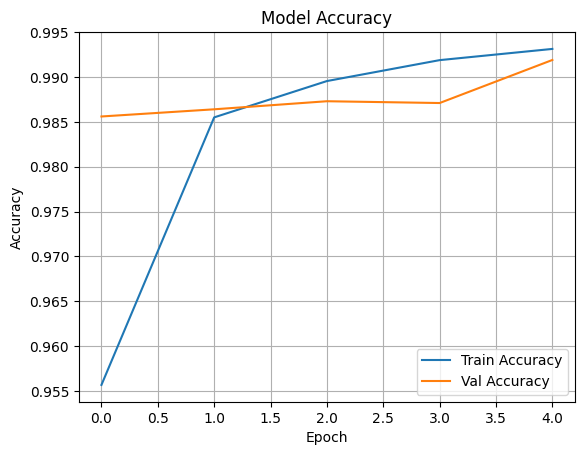

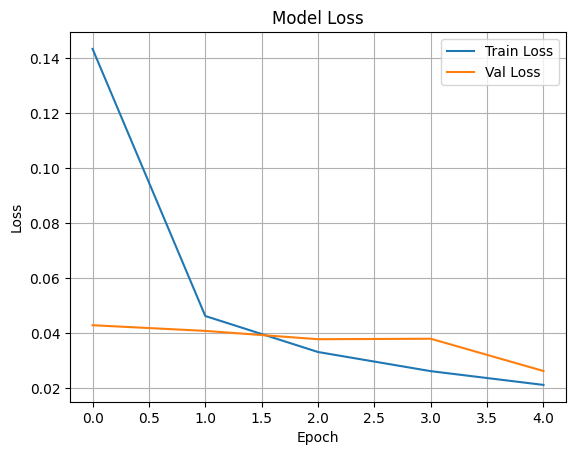

In [30]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [31]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 279,968 (1.07 MB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 186,646 (729.09 KB)